# [VADER] Dependencies and Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#Reading the review dataset
df = pd.read_csv('Womens Clothing E-commerce Reviews.csv')
#initializing the SIA Object
SIA_Object = SentimentIntensityAnalyzer()
#Check the dataset if accessible via "df"
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


**Labeling "Positive, Neutral, Negative" via Ratings (0 - 2 is Negative, 3 is Neutral, 4 - 5 is Positive**

In [2]:
res = {}
for x, row in tqdm(df.iterrows(), total=len(df)):
    verdict = ''
    if row['Rating'] >= 0 and row['Rating'] <= 2:
        verdict = 'Negative'
    elif row['Rating'] == 3:
        verdict = 'Neutral'
    else:
        verdict = 'Positive'
    res[row['Unnamed: 0']] = verdict

  0%|          | 0/23486 [00:00<?, ?it/s]

**Merging the Results**

In [3]:
rating_verdict = pd.DataFrame(res, index=['Rating Verdict']).T
rating_verdict = rating_verdict.reset_index().rename(columns={'index': 'Unnamed: 0'})
rating_verdict = rating_verdict.merge(df, how='left')
rating_verdict

,Unnamed: 0,Rating Verdict,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,Positive,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,Positive,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,Neutral,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,Positive,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,Positive,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,Positive,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,Neutral,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,Neutral,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,Neutral,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


**Testing Sentiment Scores with a simple sentence**

In [4]:
SIA_Object.polarity_scores("I like this shirt! Comfortable and made from high-quality frabic.")

{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.7263}

In [5]:
SIA_Object.polarity_scores("I don't like this shirt! Uncomfortable and made from low-quality frabic.")

{'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.6126}

**Getting the Polarity Score on all the review entries**

In [6]:
res = {}
for x, row in tqdm(rating_verdict.iterrows(), total=len(rating_verdict)):
    res[row['Unnamed: 0']] = SIA_Object.polarity_scores(str(row['Review Text']))

  0%|          | 0/23486 [00:00<?, ?it/s]

**Check the results**

In [7]:
res

{0: {'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.8932},
 1: {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9729},
 2: {'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9427},
 3: {'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'compound': 0.5727},
 4: {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9291},
 5: {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.9419},
 6: {'neg': 0.023, 'neu': 0.881, 'pos': 0.096, 'compound': 0.8004},
 7: {'neg': 0.046, 'neu': 0.901, 'pos': 0.053, 'compound': -0.0909},
 8: {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.7175},
 9: {'neg': 0.12, 'neu': 0.753, 'pos': 0.126, 'compound': -0.3724},
 10: {'neg': 0.044, 'neu': 0.877, 'pos': 0.079, 'compound': 0.3578},
 11: {'neg': 0.0, 'neu': 0.319, 'pos': 0.681, 'compound': 0.8927},
 12: {'neg': 0.026, 'neu': 0.899, 'pos': 0.075, 'compound': 0.552},
 13: {'neg': 0.029, 'neu': 0.833, 'pos': 0.138, 'compound': 0.8036},
 14: {'neg': 0.074, 'neu': 0.752, 'pos': 0.174, 'compound': 0

**Merge the Polarity Scores with their corresponding row in the original data set**

In [8]:
final_results_vader = pd.DataFrame(res).T
final_results_vader = final_results_vader.reset_index().rename(columns={'index': 'Unnamed: 0'})
final_results_vader = final_results_vader.merge(rating_verdict, how='left')

**Displaying the results**

In [9]:
final_results_vader

,Unnamed: 0,neg,neu,pos,compound,Rating Verdict,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0.000,0.272,0.728,0.8932,Positive,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,0.000,0.664,0.336,0.9729,Positive,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,0.027,0.792,0.181,0.9427,Neutral,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,0.226,0.340,0.434,0.5727,Positive,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,0.000,0.700,0.300,0.9291,Positive,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,0.065,0.547,0.388,0.9152,Positive,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,0.068,0.735,0.197,0.6652,Neutral,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,0.000,0.704,0.296,0.9343,Neutral,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,0.068,0.812,0.120,0.6692,Neutral,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


**Labeling as TP/TN/FP/FN**

In [10]:
res = {}
for x, row in tqdm(final_results_vader.iterrows(), total=len(final_results_vader)):
    result_type_vader = ''
    if row['compound'] > 0 and row['Rating Verdict']=='Positive':
        result_type_vader = 'True Positive'
    elif row['compound'] < 0 and row['Rating Verdict']=='Negative':
        result_type_vader = 'True Negative'
    elif row['compound'] > 0 and row['Rating Verdict']=='Negative':
        result_type_vader = 'False Positives'
    elif row['compound'] < 0 and row['Rating Verdict']=='Positive':
        result_type_vader = 'False Negative'
    else:
        result_type_vader = 'Neutral'
    res[row['Unnamed: 0']] = result_type_vader

vader_result_label = pd.DataFrame(res, index=['vader_result_label']).T
vader_result_label = vader_result_label.reset_index().rename(columns={'index': 'Unnamed: 0'})
vader_result_label = vader_result_label.merge(final_results_vader, how='left')

  0%|          | 0/23486 [00:00<?, ?it/s]

**See results**

In [11]:
vader_result_label

,Unnamed: 0,vader_result_label,neg,neu,pos,compound,Rating Verdict,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,True Positive,0.000,0.272,0.728,0.8932,Positive,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,True Positive,0.000,0.664,0.336,0.9729,Positive,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,Neutral,0.027,0.792,0.181,0.9427,Neutral,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,True Positive,0.226,0.340,0.434,0.5727,Positive,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,True Positive,0.000,0.700,0.300,0.9291,Positive,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,True Positive,0.065,0.547,0.388,0.9152,Positive,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,Neutral,0.068,0.735,0.197,0.6652,Neutral,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,Neutral,0.000,0.704,0.296,0.9343,Neutral,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,Neutral,0.068,0.812,0.120,0.6692,Neutral,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


**Visualize the results to something easier to interpret**

<function matplotlib.pyplot.show(close=None, block=None)>

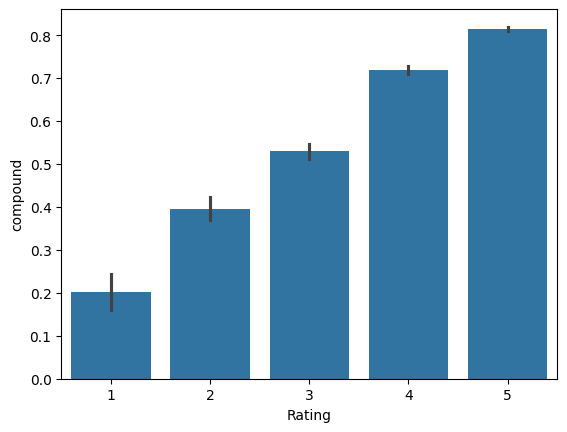

In [12]:
score_display = sb.barplot(data=vader_result_label, x='Rating', y='compound')
score_display.set_title = ("Sentiment Score Summary")
plt.style.use('ggplot')
plt.show

**Here we can see that the increase in rating is proportionate to the increase of the compound score. We will be discussing and comparing more of the results with the Transformer roBERTa Model later**

# [roBERTa] Dependencies and Imports

In [13]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

**Getting the model. We will be using a pre-trained model**

In [14]:
roBERTa_model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(roBERTa_model)
roBERTa_model = AutoModelForSequenceClassification.from_pretrained(roBERTa_model)

In [15]:
tokenizer("I like eating ice cream!", return_tensors='pt')

{'input_ids': tensor([[   0,  100,  101, 4441, 2480, 6353,  328,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

**Scores Calculation via roBERTa model**

In [16]:
def roBERTa_model_func(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = roBERTa_model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

**Getting all the Polarity Scores for all the entries using the roBERTa Model**

In [17]:
res = {}
for x, row in tqdm(vader_result_label.iterrows(), total=len(vader_result_label)):
    res[row['Unnamed: 0']] = roBERTa_model_func(str(row['Review Text']))

  0%|          | 0/23486 [00:00<?, ?it/s]

**Checking the Results and Merging**

In [18]:
final_results_roBERTa = pd.DataFrame(res).T
final_results_roBERTa = final_results_roBERTa.reset_index().rename(columns={'index': 'Unnamed: 0'})
final_results_roBERTa = final_results_roBERTa.merge(vader_result_label, how='left')
final_results_roBERTa

,Unnamed: 0,roberta_neg,roberta_neu,roberta_pos,vader_result_label,neg,neu,pos,compound,Rating Verdict,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0.002245,0.010576,0.987180,True Positive,0.000,0.272,0.728,0.8932,Positive,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,0.001609,0.007436,0.990955,True Positive,0.000,0.664,0.336,0.9729,Positive,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,0.366802,0.380140,0.253058,Neutral,0.027,0.792,0.181,0.9427,Neutral,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,0.002247,0.004622,0.993131,True Positive,0.226,0.340,0.434,0.5727,Positive,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,0.001239,0.006733,0.992028,True Positive,0.000,0.700,0.300,0.9291,Positive,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,0.001105,0.006981,0.991914,True Positive,0.065,0.547,0.388,0.9152,Positive,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,0.129048,0.323072,0.547881,Neutral,0.068,0.735,0.197,0.6652,Neutral,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,0.046035,0.150881,0.803084,Neutral,0.000,0.704,0.296,0.9343,Neutral,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,0.390427,0.373043,0.236531,Neutral,0.068,0.812,0.120,0.6692,Neutral,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


**Labeling Results**

In [19]:
res = {}
for x, row in tqdm(final_results_roBERTa.iterrows(), total=len(final_results_roBERTa)):
    result_type_roBERTa = ''
    if ((row['roberta_pos'] > row['roberta_neu']) and (row['roberta_pos'] > row['roberta_neg'])) and row['Rating Verdict']=='Positive':
        result_type_roBERTa = 'True Positive'
    elif ((row['roberta_neg'] > row['roberta_neu']) and (row['roberta_neg'] > row['roberta_pos'])) and row['Rating Verdict']=='Negative':
        result_type_roBERTa = 'True Negative'
    elif ((row['roberta_pos'] > row['roberta_neu']) and (row['roberta_pos'] > row['roberta_neg'])) and row['Rating Verdict']=='Negative':
        result_type_roBERTa = 'False Positives'
    elif ((row['roberta_neg'] > row['roberta_neu']) and (row['roberta_neg'] > row['roberta_pos'])) and row['Rating Verdict']=='Positive':
        result_type_roBERTa = 'False Negative'
    else:
        result_type_roBERTa = 'Neutral'
    res[row['Unnamed: 0']] = result_type_roBERTa

final_combined_result = pd.DataFrame(res, index=['roBERTa_result_label']).T
final_combined_result = final_combined_result.reset_index().rename(columns={'index': 'Unnamed: 0'})
final_combined_result = final_combined_result.merge(final_results_roBERTa, how='left')

  0%|          | 0/23486 [00:00<?, ?it/s]

**Checking Raw Results**

In [32]:
r_counts = final_combined_result.groupby('roBERTa_result_label')['Unnamed: 0'].count()
r_counts

roBERTa_result_label
False Negative       330
False Positives      753
Neutral             4505
True Negative       1301
True Positive      16597
Name: Unnamed: 0, dtype: int64

In [33]:
v_counts = final_combined_result.groupby('vader_result_label')['Unnamed: 0'].count()
v_counts

vader_result_label
False Negative       402
False Positives     1696
Neutral             3768
True Negative        631
True Positive      16989
Name: Unnamed: 0, dtype: int64

**Calculating Accuracy**

In [39]:
r_accuracy = ((r_counts['True Negative'] + r_counts['True Positive']) / (r_counts['False Negative'] + r_counts['False Positives'] + r_counts['True Negative'] + r_counts['True Positive']) * 100)
v_accuracy = ((v_counts['True Negative'] + v_counts['True Positive']) / (v_counts['False Negative'] + v_counts['False Positives'] + v_counts['True Negative'] + v_counts['True Positive']) * 100)
print("Vader Accuracy: ", v_accuracy, "%")
print("roBERTa Accuracy: ", r_accuracy, "%")

Vader Accuracy:  89.35997565676031 %
roBERTa Accuracy:  94.29429429429429 %


**Calculating Precision**

In [46]:
r_Precision = (r_counts['True Positive'] / (r_counts['True Positive'] + r_counts['False Positives']))
v_Precision = (v_counts['True Positive'] / (v_counts['True Positive'] + v_counts['False Positives']))
print("Vader Precision: ", v_Precision)
print("roBERTa Precision: ", r_Precision)

Vader Precision:  0.9092320042815092
roBERTa Precision:  0.9565994236311239


**Calculating Recall**

In [47]:
r_Recall = (r_counts['True Positive'] / (r_counts['True Positive'] + r_counts['False Negative']))
v_Recall = (v_counts['True Positive'] / (v_counts['True Positive'] + v_counts['False Negative']))
print("Vader Recall: ", v_Recall)
print("roBERTa Recall: ", r_Recall)

Vader Recall:  0.976884595480421
roBERTa Recall:  0.9805045194068648


**Calculating Specificity**

In [78]:
r_Spec = (r_counts['True Negative'] / (r_counts['True Negative'] + r_counts['False Positives']))
v_Spec = (v_counts['True Negative'] / (v_counts['True Negative'] + v_counts['False Positives']))
print("Vader Specificity: ", v_Spec)
print("roBERTa Specificity: ", r_Spec)

Vader Specificity:  0.2711645896003438
roBERTa Specificity:  0.633398247322298


**Calculating F1-Score**

In [79]:
r_f1 = ((2*(r_Precision * r_Recall)) / (r_Precision + r_Recall))
v_f1 = ((2*(v_Precision * v_Recall)) / (v_Precision + v_Recall))
print("Vader F1-Score: ", v_f1)
print("roBERTa F1-Score: ", r_f1)

Vader F1-Score:  0.9418449939017629
roBERTa F1-Score:  0.9684044694693236


**Checking how the models calculate sarcastic / ironic comments**

In [80]:
#VADER MODEL
SIA_Object.polarity_scores("The quality of the product was so high that it broke after 1 use! Definitely recommend!")

{'neg': 0.136, 'neu': 0.583, 'pos': 0.281, 'compound': 0.4559}

In [81]:
#roBERTa MODEL
roBERTa_model_func("The quality of the product was so high that it broke after 1 use! Definitely recommend!")

{'roberta_neg': 0.004396171,
 'roberta_neu': 0.023617167,
 'roberta_pos': 0.9719866}